In [1]:
import numpy as np 
import pandas as pd 
import os

TITANIC_DATA_PATH = "train.csv"

titanic_dataset = pd.read_csv(TITANIC_DATA_PATH)

## Learning the dataset

In [2]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
import matplotlib.pyplot as plt
# titanic_dataset.hist(bins=50, figsize=(20,15))
# plt.show()

## Splitting the data stratisfiedly, based on survivors

In [6]:
titanic_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in sss.split(titanic_dataset, titanic_dataset["Survived"]):
    strat_train_set = titanic_dataset.loc[train_index]
    strat_test_set = titanic_dataset.loc[test_index]

In [8]:
strat_test_set['Survived'].value_counts()

Survived
0    110
1     69
Name: count, dtype: int64

In [9]:
titanic_dataset = strat_train_set.copy()

In [10]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Separating data and label

In [11]:
titanic_dataset_prepared = titanic_dataset.drop("Survived", axis=1)
titanic_dataset_label = titanic_dataset["Survived"].copy()
titanic_dataset_label

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64

In [12]:
titanic_dataset_prepared

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
462,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


## Pipeline

In [13]:
def simplify_title(title):
    if title in ['Mlle', 'Ms', 'Miss']:
        return 'Miss'
    elif title in ['Mme', 'Mrs']:
        return 'Mrs'
    elif title == 'Mr':
        return 'Mr'
    else:
        return 'Rare'

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomAttributeTransformer(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, data):
        data = data.copy()
        data.drop(columns=['Ticket'], inplace=True)
        data.drop(columns=['Cabin'], inplace=True) 
        data.drop(columns=['Embarked'], inplace=True)
        data.drop(columns=['PassengerId'], inplace=True)
    
        # Change name into title
        data['Title'] = data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
        # print(data['Title'].value_counts())
        data['Title'] = data['Title'].apply(simplify_title)
        data['Sex'] = (
        data['Sex']
        .str.strip()
        .str.lower()
        .map({'male': 1, 'female': 0})
    )
        data.drop(columns=['Name'], inplace=True)
        return data

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [16]:
# # # Okay so custom works perfectly
# custom = CustomAttributeTransformer()
# custom.transform(titanic_dataset_prepared)
# titanic_dataset_prepared

In [17]:
from sklearn.compose import ColumnTransformer
num_attribs = list(titanic_dataset_prepared.select_dtypes(include="number").columns) + ["Sex"]
num_attribs.remove('PassengerId')

print(num_attribs)

cat_attribs = ["Title"]

full_pipeline = Pipeline([
    ('custom', CustomAttributeTransformer()),
    ('preprocess', ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ]))  
])

titanic_dataset_train = full_pipeline.fit_transform(titanic_dataset_prepared)
titanic_dataset_train

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']


array([[ 0.82956755, -0.08113533, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       [-0.37094484, -0.08113533, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       [-1.57145722, -0.08113533, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82956755,  1.41700669,  0.47833454, ...,  0.        ,
         1.        ,  0.        ],
       [-1.57145722,  1.34017889, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       [-1.57145722, -0.08113533, -0.46508428, ...,  1.        ,
         0.        ,  0.        ]], shape=(712, 10))

In [18]:
ct = full_pipeline.named_steps['preprocess']
titanic_dataset = pd.DataFrame(
    titanic_dataset_train, columns= ct.get_feature_names_out(), index=titanic_dataset_prepared.index
)
titanic_dataset

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__Sex,cat__Title_Miss,cat__Title_Mr,cat__Title_Mrs,cat__Title_Rare
692,0.829568,-0.081135,-0.465084,-0.466183,0.513812,0.742427,0.0,1.0,0.0,0.0
481,-0.370945,-0.081135,-0.465084,-0.466183,-0.662563,0.742427,0.0,1.0,0.0,0.0
527,-1.571457,-0.081135,-0.465084,-0.466183,3.955399,0.742427,0.0,1.0,0.0,0.0
855,0.829568,-0.887827,-0.465084,0.727782,-0.467874,-1.346933,0.0,0.0,1.0,0.0
801,-0.370945,0.110934,0.478335,0.727782,-0.115977,-1.346933,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
359,0.829568,-0.081135,-0.465084,-0.466183,-0.498500,-1.346933,1.0,0.0,0.0,0.0
258,-1.571457,0.418245,-0.465084,-0.466183,10.005329,-1.346933,1.0,0.0,0.0,0.0
736,0.829568,1.417007,0.478335,3.115713,0.053205,-1.346933,0.0,0.0,1.0,0.0
462,-1.571457,1.340179,-0.465084,-0.466183,0.139097,0.742427,0.0,1.0,0.0,0.0


array([[<Axes: title={'center': 'num__Pclass'}>,
        <Axes: title={'center': 'num__Age'}>,
        <Axes: title={'center': 'num__SibSp'}>],
       [<Axes: title={'center': 'num__Parch'}>,
        <Axes: title={'center': 'num__Fare'}>,
        <Axes: title={'center': 'num__Sex'}>],
       [<Axes: title={'center': 'cat__Title_Miss'}>,
        <Axes: title={'center': 'cat__Title_Mr'}>,
        <Axes: title={'center': 'cat__Title_Mrs'}>],
       [<Axes: title={'center': 'cat__Title_Rare'}>, <Axes: >, <Axes: >]],
      dtype=object)

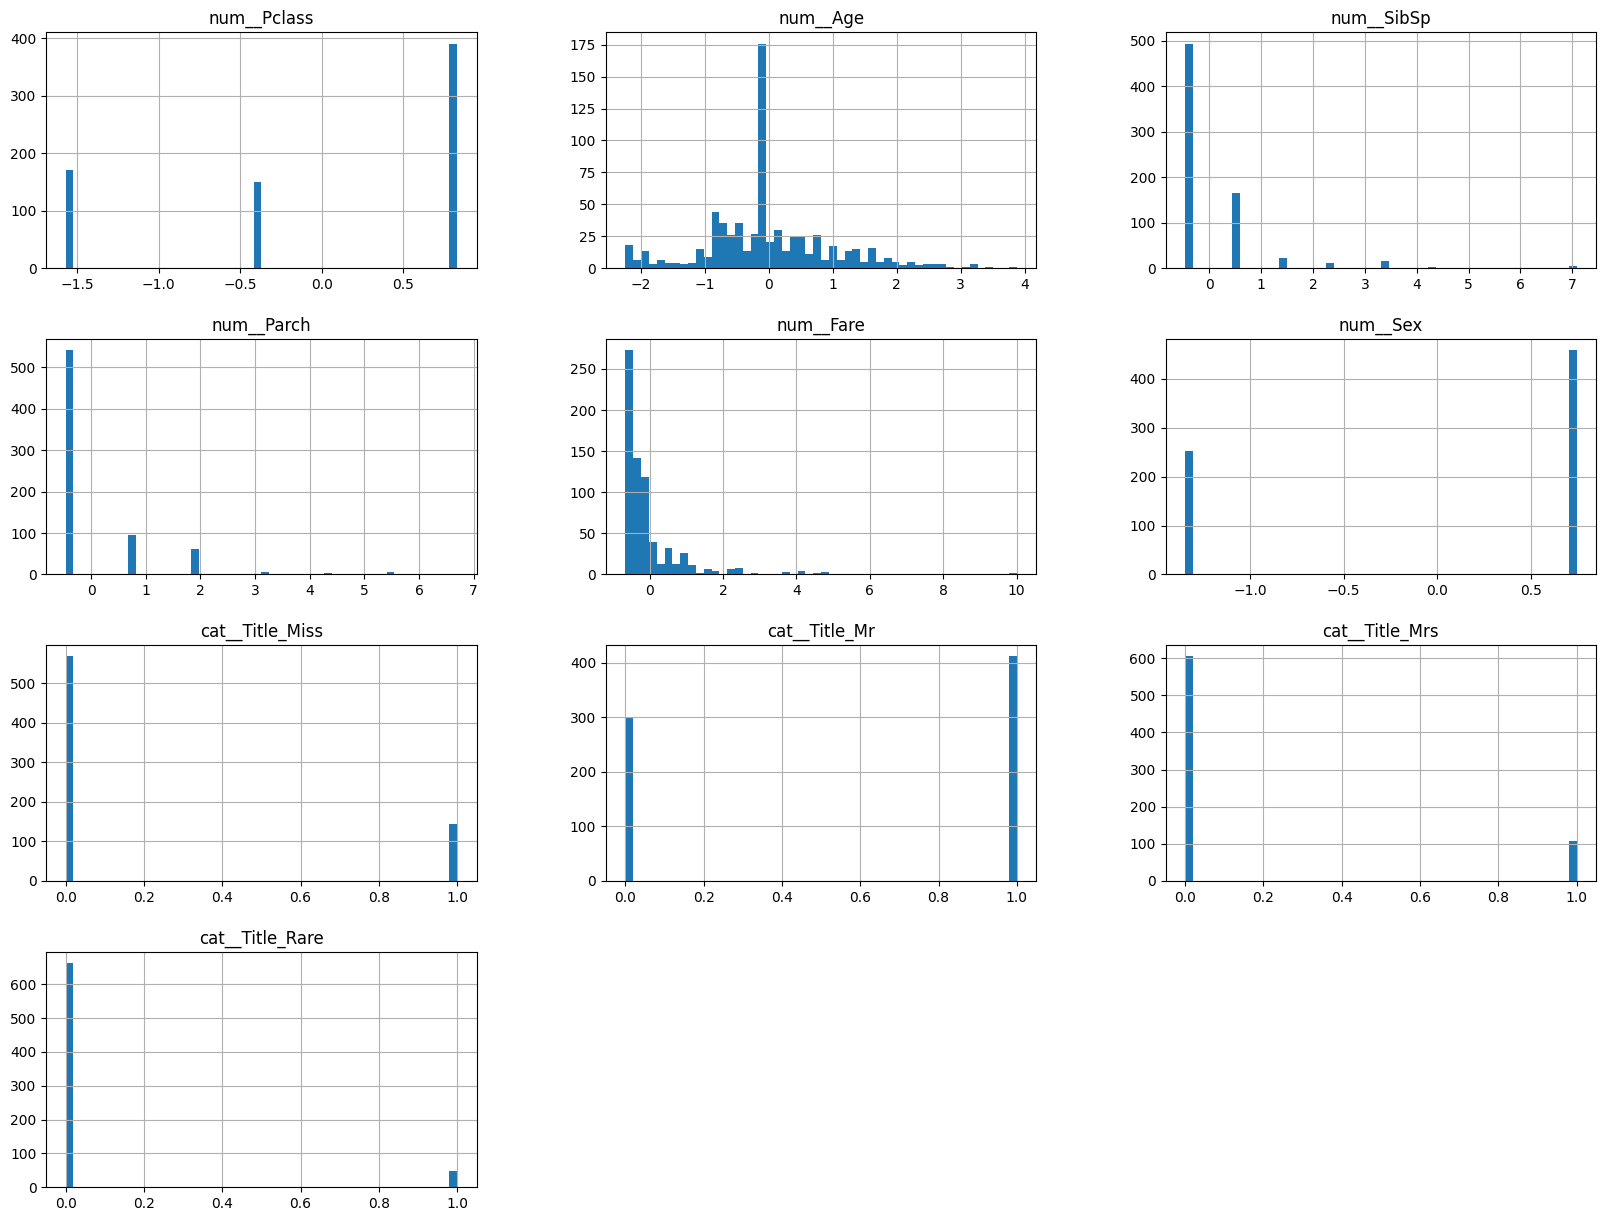

In [19]:
titanic_dataset.hist(bins=50, figsize=(20,15))

## Training a model (Decision Tree, Random Forest, Logistic Regression)

In [20]:
# # Okay maybe let's not use linear regression, since the result it's not regression type it's classification
from sklearn.linear_model import LogisticRegression
# # titanic_dataset_prepared dataset buat latihan
# # titanic_dataset_label buat label
log_reg = LogisticRegression()
log_reg.fit(titanic_dataset, titanic_dataset_label)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier()
tree_class.fit(titanic_dataset, titanic_dataset_label)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [22]:
from sklearn.ensemble import RandomForestClassifier

rd_forest = RandomForestClassifier()
rd_forest.fit(titanic_dataset, titanic_dataset_label)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [23]:
some_data = titanic_dataset.iloc[:5]
some_labels = titanic_dataset_label.iloc[:5]

print("Predictions:", tree_class.predict(some_data))
print("Labels: ", list(some_labels))
# some_data_prepared = full_pipeline.transform(some_data)

Predictions: [1 0 0 1 1]
Labels:  [1, 0, 0, 1, 1]


### This is overfitting, since we are training and model evaluating using the same data

## Cross Validating with every model

In [24]:
from sklearn.model_selection import cross_val_score

dec_tree_scores = cross_val_score(tree_class, titanic_dataset, titanic_dataset_label, scoring="accuracy", cv=8)
print("Scores:", dec_tree_scores)

Scores: [0.75280899 0.71910112 0.74157303 0.79775281 0.79775281 0.80898876
 0.75280899 0.7752809 ]


In [25]:
rd_scores = cross_val_score(rd_forest, titanic_dataset, titanic_dataset_label, scoring="accuracy", cv=8)
print("Scores:", rd_scores)

Scores: [0.75280899 0.78651685 0.78651685 0.83146067 0.84269663 0.86516854
 0.7752809  0.78651685]


In [26]:
log_reg_scores = cross_val_score(log_reg, titanic_dataset, titanic_dataset_label, scoring="accuracy", cv=8)
print("Scores:", log_reg_scores)

Scores: [0.76404494 0.79775281 0.74157303 0.85393258 0.83146067 0.82022472
 0.80898876 0.80898876]


## Grid Search (Decision Tree)

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    "max_depth": [None, 3, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

dec_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(dec_tree, param_grid_dt, cv=5, scoring="accuracy", return_train_score=True, n_jobs=-1)
grid_search.fit(titanic_dataset, titanic_dataset_label)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fol

In [28]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [29]:
grid_search.best_score_

np.float64(0.8287304245050724)

In [30]:
# cvres = grid_search.cv_results_
# for score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(score, params)

## Randomized Grid Search (Random Forest)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 30),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

forest_clf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    forest_clf,
    param_dist,
    n_iter=50,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [32]:
random_search.fit(titanic_dataset, titanic_dataset_label)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': <scipy.stats....00264E6B603B0>, 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': <scipy.stats....00264E6CB0530>, 'min_samples_split': <scipy.stats....00264E6CB3230>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` f

In [33]:
random_search.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 140}

In [34]:
random_search.best_score_

np.float64(0.8259135230966216)

## Grid Search (Logistic Regression)

In [35]:
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],  # lbfgs supports only l2 or none
    "solver": ["lbfgs"],  
    "max_iter": [500, 1000]
}

lr_clf = LogisticRegression(random_state=42)

In [36]:
grid_lr = GridSearchCV(
    lr_clf,
    param_grid_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_lr.fit(titanic_dataset, titanic_dataset_label)

print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.811878262582488


D:\Programming\titanic\titanic\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [37]:
models = {
    "Decision Tree": grid_search.best_score_,
    "Random Forest": random_search.best_score_,
    "Logistic Regression": grid_lr.best_score_
}

models

{'Decision Tree': np.float64(0.8287304245050724),
 'Random Forest': np.float64(0.8259135230966216),
 'Logistic Regression': np.float64(0.811878262582488)}

## Checking feature importances

In [38]:
# Decision Tree
importances = grid_search.best_estimator_.feature_importances_
feature_names = titanic_dataset.columns  # or the columns after preprocessing
feat_importances_dt = pd.Series(importances, index=feature_names)
feat_importances_dt.sort_values(ascending=False)

num__Sex           0.499477
num__Pclass        0.241239
num__Fare          0.107640
num__Age           0.097623
num__Parch         0.039430
num__SibSp         0.008636
cat__Title_Rare    0.005954
cat__Title_Miss    0.000000
cat__Title_Mr      0.000000
cat__Title_Mrs     0.000000
dtype: float64

In [39]:
# Random Forest
importances = random_search.best_estimator_.feature_importances_
feature_names = titanic_dataset.columns  # or the columns after preprocessing
feat_importances_dt = pd.Series(importances, index=feature_names)
feat_importances_dt.sort_values(ascending=False)

cat__Title_Mr      0.286661
num__Fare          0.218141
num__Sex           0.203082
num__Age           0.132510
num__Pclass        0.122654
num__SibSp         0.021645
num__Parch         0.008985
cat__Title_Miss    0.002595
cat__Title_Mrs     0.001876
cat__Title_Rare    0.001851
dtype: float64

In [40]:
# Logistic Regression
importances = grid_lr.best_estimator_
coef = pd.Series(importances.coef_[0], index=titanic_dataset.columns)
coef.sort_values(ascending=False)

cat__Title_Rare    0.705058
cat__Title_Mrs     0.474962
num__Fare          0.217745
cat__Title_Miss   -0.205974
num__Parch        -0.223398
num__SibSp        -0.391832
num__Age          -0.493213
num__Pclass       -0.803213
num__Sex          -0.934635
cat__Title_Mr     -1.007814
dtype: float64

## Save Model

In [41]:
import joblib

joblib.dump(grid_search.best_estimator_, "Decision_Tree_NoEmbarked.pkl")
joblib.dump(random_search.best_estimator_, "Random_Forest_NoEmbarked.pkl")
joblib.dump(grid_lr.best_estimator_, "Logistic_Regression_NoEmbarked.pkl")

['Logistic_Regression_NoEmbarked.pkl']

## Test With Testing Data

In [42]:
final_model = random_search.best_estimator_

x_test = strat_test_set.drop("Survived", axis=1)
y_test = strat_test_set["Survived"].copy()

x_test_prepared = full_pipeline.transform(x_test)

In [43]:
ct = full_pipeline.named_steps['preprocess']
x_test_final = pd.DataFrame(
    x_test_prepared, columns= ct.get_feature_names_out(), index=x_test.index
)
x_test_final

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__Sex,cat__Title_Miss,cat__Title_Mr,cat__Title_Mrs,cat__Title_Rare
565,0.829568,-0.426860,1.421753,-0.466183,-0.159704,0.742427,0.0,1.0,0.0,0.0
160,0.829568,1.109696,-0.465084,0.727782,-0.327324,0.742427,0.0,1.0,0.0,0.0
553,0.829568,-0.580516,-0.465084,-0.466183,-0.512122,0.742427,0.0,1.0,0.0,0.0
860,0.829568,0.879212,1.421753,-0.466183,-0.368795,0.742427,0.0,1.0,0.0,0.0
241,0.829568,-0.081135,0.478335,-0.466183,-0.339817,-1.346933,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
880,-0.370945,-0.350033,-0.465084,0.727782,-0.121182,-1.346933,0.0,0.0,1.0,0.0
91,0.829568,-0.734172,-0.465084,-0.466183,-0.499020,0.742427,0.0,1.0,0.0,0.0
883,-0.370945,-0.119549,-0.465084,-0.466183,-0.443929,0.742427,0.0,1.0,0.0,0.0
473,-0.370945,-0.503688,-0.465084,-0.466183,-0.375388,-1.346933,0.0,0.0,1.0,0.0


In [44]:
final_prediction = final_model.predict(x_test_final)

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, final_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


## Test With Actual Testing Data From Kaggle

In [59]:
TITANIC_TEST_PATH = "test.csv"

titanic_test = pd.read_csv(TITANIC_TEST_PATH)
prediciton_result = titanic_test["PassengerId"]
prediction_result_final = pd.DataFrame(
    prediciton_result, columns= ["PassengerId"], index=titanic_test.index
)
prediction_result_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [47]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [50]:
X_test = full_pipeline.transform(titanic_test)
X_test

array([[ 0.82956755,  0.37983144, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82956755,  1.34017889,  0.47833454, ...,  0.        ,
         1.        ,  0.        ],
       [-0.37094484,  2.49259583, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.82956755,  0.68714263, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82956755, -0.08113533, -0.46508428, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82956755, -0.08113533,  0.47833454, ...,  0.        ,
         0.        ,  1.        ]], shape=(418, 10))

In [51]:
ct = full_pipeline.named_steps['preprocess']
titanic_test_final = pd.DataFrame(
    X_test, columns= ct.get_feature_names_out(), index=titanic_test.index
)
titanic_test_final

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__Sex,cat__Title_Miss,cat__Title_Mr,cat__Title_Mrs,cat__Title_Rare
0,0.829568,0.379831,-0.465084,-0.466183,-0.499541,0.742427,0.0,1.0,0.0,0.0
1,0.829568,1.340179,0.478335,-0.466183,-0.516807,-1.346933,0.0,0.0,1.0,0.0
2,-0.370945,2.492596,-0.465084,-0.466183,-0.460847,0.742427,0.0,1.0,0.0,0.0
3,0.829568,-0.196377,-0.465084,-0.466183,-0.482190,0.742427,0.0,1.0,0.0,0.0
4,0.829568,-0.580516,0.478335,0.727782,-0.406709,-1.346933,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,0.829568,-0.081135,-0.465084,-0.466183,-0.494943,0.742427,0.0,1.0,0.0,0.0
414,-1.571457,0.725557,-0.465084,-0.466183,1.604990,-1.346933,0.0,0.0,0.0,1.0
415,0.829568,0.687143,-0.465084,-0.466183,-0.511601,0.742427,0.0,1.0,0.0,0.0
416,0.829568,-0.081135,-0.465084,-0.466183,-0.494943,0.742427,0.0,1.0,0.0,0.0


In [52]:
kaggle_final_prediction = final_model.predict(titanic_test_final)

In [53]:
print(kaggle_final_prediction)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [63]:
survivor = pd.DataFrame(
    kaggle_final_prediction, columns= ["Survived"], index=titanic_test.index
)
survivor

,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [69]:
prediction = prediction_result_final.join(survivor)
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
prediction.to_csv('Prediction.csv', index=False)